# Classification and Regression: how good is your model?

What is **model validation** and why is it important? There are a few questions that you should **always** ask yourself if you are doing machine learning, or fitting any model to your data. Just a few of them here..

    Is your model performing well?
    Is it overfitted or underfitted?
    Does it perform better than the null model?
    Is is generalisable?
    
If you worked on machine learning in the past, you probably know how to answer all these questions, and this workshop might be easy from the machine learning point of view, but interesting because you will find out whether you can predict **heart** diseases using different features. But if you didn't, this is your opportunity to learn more about it. In order to try to make the workshop interesting both for people with experience in Python/ML, and people without, the workshop will be characterised by some theory and some small *coding challenges*. The coding challenges will have two different levels: the *coding challenges* marked as **Bonus** will be slightly more advanced, so if you are not super familiar with ML, and/or Python, feel free to skip them. If you end up being curious on how to actually do them in the future, feel free to drop me an email.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random
from tqdm import tqdm 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler


from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings

warnings.filterwarnings("ignore")

In [73]:
heart = pd.read_csv("heart.csv") # Read csv file
heart.head(n = 5)                # Print the first five rows of the dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
Y = heart["target"]                  
X = heart.drop("target", axis = 1)

One of the first things 

In [41]:
Y.value_counts(normalize = True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [72]:
## Address class imbalance: balanced weigth VS BONUS: other techniques

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25, 
                                                    random_state=12, 
                                                    shuffle=True, stratify=Y)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# Initialise the classifier

classifier = SVC(class_weight = "balanced", random_state=10, kernel = "rbf")

# Train a Support Vector Machines classifier on the train set 

classifier.fit(X_train, y_train)

# Get predictions for the training and testing sets

y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

##### Coding challenge: code different metrics of performance

##### BONUS coding challenge: which features are most important in making the predictions? 

## Hyperparameters fine-tuning on the validation set

In [45]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Training set accuracy: ", accuracy_train)
print("Testing set accuracy: ", accuracy_test)

Training set accuracy:  0.9251101321585903
Testing set accuracy:  0.7894736842105263


In [46]:
confusion_mat = confusion_matrix(y_test, y_pred_test)
confusion_mat

array([[23, 12],
       [ 4, 37]])

## K-Fold cross validation

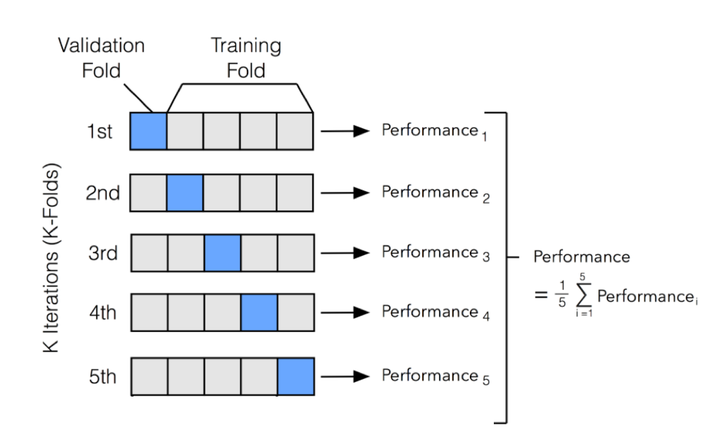

In [47]:
# Initiate k-fold splits

kfolds = KFold(n_splits=10, shuffle=True, random_state=10)
accuracies = []

# loop through the folds

for train_index, test_index in kfolds.split(X, Y):
    
    # Obtain the different folds, or data subsets
    X_train, X_test = X.loc[train_index], X.loc[test_index]    
    y_train, y_test = Y.loc[train_index], Y.loc[test_index]
    
    # Scale the datasets
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the classifier
    classifier = SVC(class_weight='balanced', random_state=12)
    classifier.fit(X_train, y_train)
    y_pred_test = classifier.predict(X_test)
    
    # Get accurancy on current test fold
    accuracies.append(accuracy_score(y_test, y_pred_test))

<AxesSubplot:>

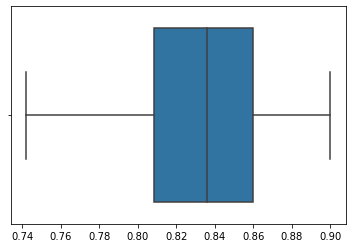

In [48]:
sb.boxplot(accuracies)

## Leave one out cross validation

Same as k-fold cross validation, but used mainly when you have smaller datasets. Consists of K-fold cross validation, where the K is equivalent to the total number of samples. Test set consists of only one. 

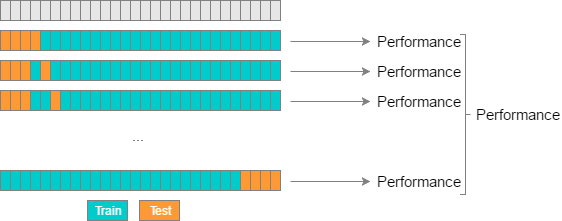

## Hyperparameters fine-tuning with K-fold cross validation

Cross validation can be commonly used for parameters tuning. 

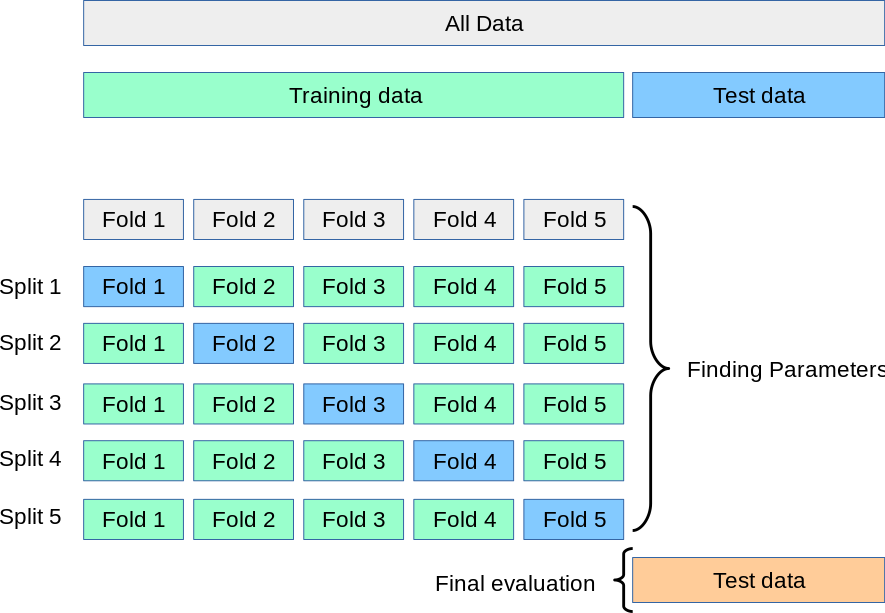

## Model significance

In [65]:
N = 500
accuracies_permuted = []
kfolds = KFold(n_splits=5, shuffle=True, random_state=10)
for permutation in tqdm(range(N)):
    random.shuffle(y_train.values)
    classifier = SVC(class_weight='balanced', random_state=12)
    classifier.fit(X_train, y_train)
    y_pred_test = classifier.predict(X_test)

    # Get accurancy on current test fold
    accuracies_permuted.append(accuracy_score(y_test, y_pred_test))


100%|███████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 155.34it/s]


(0.0, 1.0)

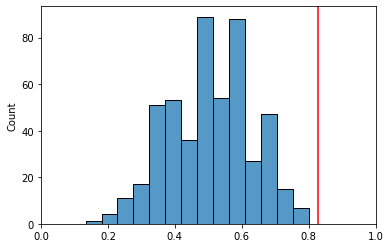

In [66]:
sb.histplot(accuracies_permuted)
plt.axvline(x = np.mean(accuracies), c = "red")
plt.xlim((0, 1))

In [67]:
pvalue = (np.mean(accuracies) < N).sum()/N
pvalue

0.002